# Plot Benchmarks

In [30]:
from io import StringIO

import pandas as pd
import seaborn as sns

Here are the commands that were run to generate the results:

```
python benchmark/benchmark_model.py --batch_szs 4 8 16 32 64
```

and

```
python benchmark_dataloader.py --root_dir /mnt/biomass/ --max_workers 8
```

## Load Results

In [31]:
m1_model_str = """
device,batch_sz,img_per_sec
cpu,4,5.2727766767118105
cpu,8,5.579173894705375
cpu,16,3.011839613130314
cpu,32,3.33172423040888
cpu,64,3.579812571790116
mps,4,47.67846355976575
mps,8,51.55928805398016
mps,16,54.312383149716716
mps,32,49.331908508233255
mps,64,44.38448913294253
"""

m1_model_df = pd.read_csv(StringIO(m1_model_str))
m1_model_df.head()

,device,batch_sz,img_per_sec
0,cpu,4,5.272777
1,cpu,8,5.579174
2,cpu,16,3.011840
3,cpu,32,3.331724
4,cpu,64,3.579813


In [8]:
rtx4000_model_str = """
device,batch_sz,img_per_sec
cpu,4,10.184123943702874
cpu,8,9.578129722778685
cpu,16,9.13996656009475
cpu,32,8.55852088207382
cpu,64,8.791254407964841
cuda,4,36.603959076179194
cuda,8,123.762600171762
cuda,16,135.05064474844735
cuda,32,143.7948904617291
cuda,64,139.80939350862602
"""

rtx4000_model_df = pd.read_csv(StringIO(rtx4000_model_str))
rtx4000_model_df.head()

,device,batch_sz,img_per_sec
0,cpu,4,10.184124
1,cpu,8,9.578130
2,cpu,16,9.139967
3,cpu,32,8.558521
4,cpu,64,8.791254


In [10]:
rtx4000_data_str = """
num_workers,img_per_sec
0,102.2217771886355
1,91.45622413521438
2,169.69678093866085
3,217.7069821736973
4,266.9462474255322
5,292.8436737712144
6,285.57058951490103
7,314.72398780646694
8,330.59210188814643
"""
rtx4000_data_df = pd.read_csv(StringIO(rtx4000_data_str))
rtx4000_data_df.head()

,num_workers,img_per_sec
0,0,102.221777
1,1,91.456224
2,2,169.696781
3,3,217.706982
4,4,266.946247


In [18]:
m1_model_df['machine'] = 'macbook m1'
rtx4000_model_df['machine'] = 'rtx 4000'
rtx4000_data_df['machine'] = 'rtx 4000'
model_df = pd.concat([m1_model_df, rtx4000_model_df])
model_df['machine-device'] = model_df.machine + ' / ' + model_df.device
model_df


,device,batch_sz,img_per_sec,machine,machine-device
0,cpu,4,5.272777,macbook m1,macbook m1 / cpu
1,cpu,8,5.579174,macbook m1,macbook m1 / cpu
2,cpu,16,3.011840,macbook m1,macbook m1 / cpu
3,cpu,32,3.331724,macbook m1,macbook m1 / cpu
4,cpu,64,3.579813,macbook m1,macbook m1 / cpu
5,mps,4,47.678464,macbook m1,macbook m1 / mps
6,mps,8,51.559288,macbook m1,macbook m1 / mps
7,mps,16,54.312383,macbook m1,macbook m1 / mps
8,mps,32,49.331909,macbook m1,macbook m1 / mps
9,mps,64,44.384489,macbook m1,macbook m1 / mps


## Plot Results

Text(0.5, 1.0, 'UNet-Resnet18 Forward-Backward Performance')

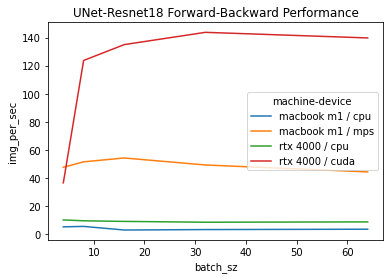

In [29]:
axes = sns.lineplot(model_df, x='batch_sz', y='img_per_sec', hue='machine-device')
axes.set_title('UNet-Resnet18 Forward-Backward Performance')

Text(0.5, 1.0, 'Data Loading Performance')

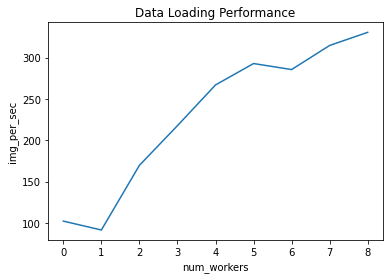

In [27]:
axes = sns.lineplot(rtx4000_data_df, x='num_workers', y='img_per_sec')
axes.set_title('Data Loading Performance')